In [36]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/reviews_badminton/data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
df['Place of review'] = df['Place of Review'].str.split(', ', expand=True)[1]

In [6]:
df.drop('Place of Review',axis = 1, inplace = True)

In [7]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [8]:
df['month'] = df['Month'].dt.month_name()
df['Year'] = df['Month'].dt.year
df.drop('Month',axis=1,inplace=True)

In [9]:
df.head()

,Reviewer Name,Review Title,Up Votes,Down Votes,Review text,Ratings,Place of review,month,Year
0,Kamal Suresh,Nice product,889.0,64.0,"Nice product, good quality, but price is now r...",4,Chirakkal,February,2021.0
1,Flipkart Customer,Don't waste your money,109.0,6.0,They didn't supplied Yonex Mavis 350. Outside ...,1,Hyderabad,February,2021.0
2,A. S. Raja Srinivasan,Did not meet expectations,42.0,3.0,Worst product. Damaged shuttlecocks packed in ...,1,Dharmapuri,April,2021.0
3,Suresh Narayanasamy,Fair,25.0,1.0,"Quite O. K. , but nowadays the quality of the...",3,Chennai,NaN,NaN
4,ASHIK P A,Over priced,147.0,24.0,Over pricedJust â?¹620 ..from retailer.I didn'...,1,NaN,April,2016.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Up Votes         8508 non-null   float64
 3   Down Votes       8508 non-null   float64
 4   Review text      8510 non-null   object 
 5   Ratings          8518 non-null   int64  
 6   Place of review  8442 non-null   object 
 7   month            8053 non-null   object 
 8   Year             8053 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 599.0+ KB


In [11]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Up Votes            10
Down Votes          10
Review text          8
Ratings              0
Place of review     76
month              465
Year               465
dtype: int64

In [12]:
df['Reviewer Name'].value_counts().idxmax()

'Flipkart Customer'

In [13]:
df['Reviewer Name'] = df['Reviewer Name'].fillna('Flipkart Customer')

In [14]:
df['Review Title'].value_counts().idxmax()

'Wonderful'

In [15]:
df['Review Title'] = df['Review Title'].fillna('Wonderful')

In [16]:
df['Review text'].mode().iloc[0]

'GoodREAD MORE'

In [17]:
df['Review text'] = df['Review text'].fillna('GoodREAD MORE')

In [18]:
df['Place of review'] = df['Place of review'].fillna('Unknown')

In [19]:
df['Up Votes'] = df['Up Votes'].fillna('0')
df['Down Votes'] = df['Down Votes'].fillna('0')

In [20]:
df['Up Votes'] = df['Up Votes'].astype('int')
df['Down Votes'] = df['Down Votes'].astype('int')

In [21]:
df['month'] = df['month'].fillna('Unknown')

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8518 non-null   object 
 1   Review Title     8518 non-null   object 
 2   Up Votes         8518 non-null   int64  
 3   Down Votes       8518 non-null   int64  
 4   Review text      8518 non-null   object 
 5   Ratings          8518 non-null   int64  
 6   Place of review  8518 non-null   object 
 7   month            8518 non-null   object 
 8   Year             8053 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 599.0+ KB


In [23]:
df.isnull().sum()

Reviewer Name        0
Review Title         0
Up Votes             0
Down Votes           0
Review text          0
Ratings              0
Place of review      0
month                0
Year               465
dtype: int64

In [24]:
df['Year'].mode()

0    2020.0
Name: Year, dtype: float64

In [25]:
df['Year'] = df['Year'].fillna('2020')

In [26]:
df['Year'] = df['Year'].astype('int')

In [27]:
df['Response'] = df['Ratings'].apply(lambda rating: 'negative' if rating <= 2 else 'positive')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    8518 non-null   object
 1   Review Title     8518 non-null   object
 2   Up Votes         8518 non-null   int64 
 3   Down Votes       8518 non-null   int64 
 4   Review text      8518 non-null   object
 5   Ratings          8518 non-null   int64 
 6   Place of review  8518 non-null   object
 7   month            8518 non-null   object
 8   Year             8518 non-null   int64 
 9   Response         8518 non-null   object
dtypes: int64(4), object(6)
memory usage: 665.6+ KB


In [29]:
df.head()

,Reviewer Name,Review Title,Up Votes,Down Votes,Review text,Ratings,Place of review,month,Year,Response
0,Kamal Suresh,Nice product,889,64,"Nice product, good quality, but price is now r...",4,Chirakkal,February,2021,positive
1,Flipkart Customer,Don't waste your money,109,6,They didn't supplied Yonex Mavis 350. Outside ...,1,Hyderabad,February,2021,negative
2,A. S. Raja Srinivasan,Did not meet expectations,42,3,Worst product. Damaged shuttlecocks packed in ...,1,Dharmapuri,April,2021,negative
3,Suresh Narayanasamy,Fair,25,1,"Quite O. K. , but nowadays the quality of the...",3,Chennai,Unknown,2020,positive
4,ASHIK P A,Over priced,147,24,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Unknown,April,2016,negative


In [40]:
def clean_text(text):
    # Calculate the length before cleaning
    len_before = len(text)

    # Remove special characters and punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphabetic words
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    cleaned_text = ' '.join(tokens)

    # Calculate the length after cleaning
    len_after = len(cleaned_text)
    return cleaned_text, len_before, len_after

#Apply text cleaning and store results in new columns
df['cleaned_text'], df['len_before'], df['len_after'] = zip(*df['Review text'].apply(clean_text))

In [43]:
# Text Normalization (Lemmatization)
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['normalized_text'] = df['cleaned_text'].apply(lemmatize_text)

In [44]:
df['normalized_text'][1]

'didnt supplied yonex mavis outside cover yonex ad inside cheapest sad hear thisread'

In [45]:
df.head()

,Reviewer Name,Review Title,Up Votes,Down Votes,Review text,Ratings,Place of review,month,Year,Response,cleaned_text,len_before,len_after,normalized_text
0,Kamal Suresh,Nice product,889,64,"Nice product, good quality, but price is now r...",4,Chirakkal,February,2021,positive,nice product good quality price rising bad sig...,204,130,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,109,6,They didn't supplied Yonex Mavis 350. Outside ...,1,Hyderabad,February,2021,negative,didnt supplied yonex mavis outside cover yonex...,118,83,didnt supplied yonex mavis outside cover yonex...
2,A. S. Raja Srinivasan,Did not meet expectations,42,3,Worst product. Damaged shuttlecocks packed in ...,1,Dharmapuri,April,2021,negative,worst product damaged shuttlecocks packed new ...,157,122,worst product damaged shuttlecock packed new b...
3,Suresh Narayanasamy,Fair,25,1,"Quite O. K. , but nowadays the quality of the...",3,Chennai,Unknown,2020,positive,quite k nowadays quality corks like years back...,388,191,quite k nowadays quality cork like year back u...
4,ASHIK P A,Over priced,147,24,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Unknown,April,2016,negative,pricedjust retaileri didnt understand wat adva...,114,78,pricedjust retaileri didnt understand wat adva...


In [46]:
df['Response'].value_counts()

positive    7441
negative    1077
Name: Response, dtype: int64

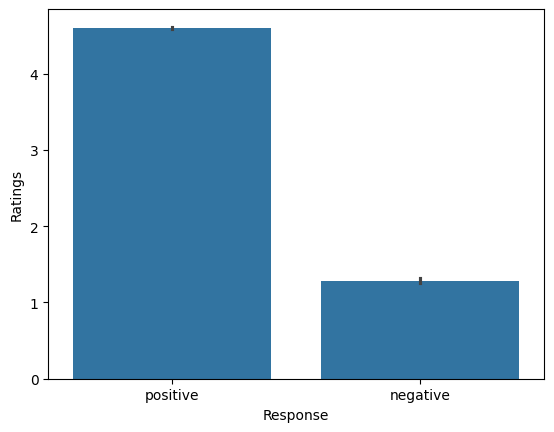

In [47]:
import seaborn as sns

sns.barplot(x='Response',y='Ratings', data=df)
plt.show()

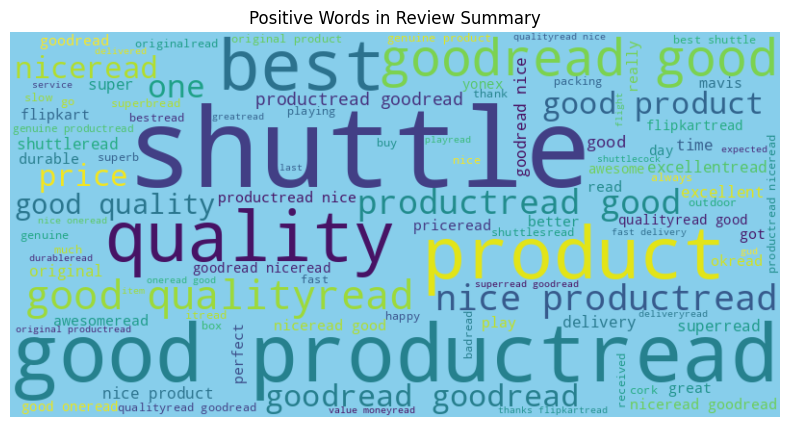

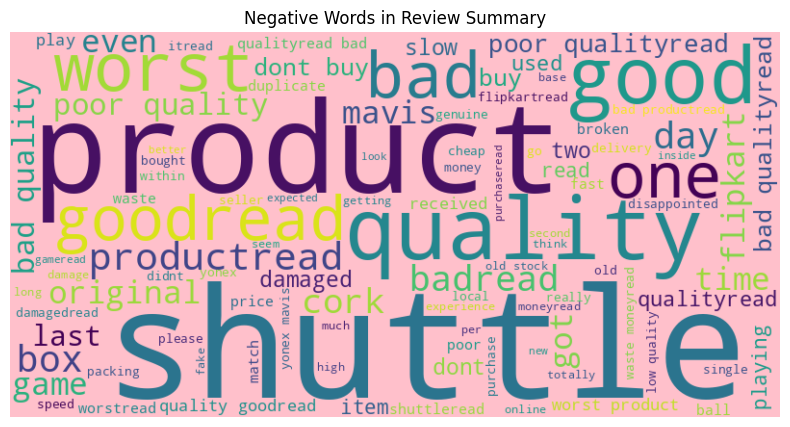

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['Response'] == 'positive']['normalized_text'].astype(str))
negative_text = " ".join(df[df['Response'] == 'negative']['normalized_text'].astype(str))


# Generate word clouds for positive and negative sentiments
positive_cloud = WordCloud(width=800, height=400, max_words=100, background_color='skyblue').generate(positive_text)
negative_cloud = WordCloud(width=800, height=400, max_words=100, background_color='pink').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_cloud, interpolation='bilinear')
plt.title('Positive Words in Review Summary')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_cloud, interpolation='bilinear')
plt.title('Negative Words in Review Summary')
plt.axis('off')
plt.show()

In [49]:
X = df['normalized_text']

y = df['Response']

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import joblib
import time
import warnings

# Disable warnings
warnings.filterwarnings('ignore')


# Assuming X_train, X_test, y_train, y_test are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Define pipelines for each algorithm
pipelines = {
    'Logistic Regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'Random Forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ]),
    'Support Vector Machine': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ]),
    'Multinomial Naive Bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ]),
}

# Define parameter grids for each algorithm
param_grids = {
    'Logistic Regression': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'vectorization__ngram_range': [(1, 1), (1, 2)],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'vectorization__ngram_range': [(1, 1), (1, 2)],
        'classifier__n_estimators': [50, 100, 200]
    },
    'Support Vector Machine': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'vectorization__ngram_range': [(1, 1), (1, 2)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'Multinomial Naive Bayes': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'vectorization__ngram_range': [(1, 1), (1, 2)],
        'classifier__alpha': [0.1, 0.5, 1.0]
    },
}

# Create new dictionaries for TF-IDF pipelines and parameter grids
tfidf_pipelines = {}
tfidf_param_grids = {}

# Add TfidfVectorizer to pipelines and param_grids
for name, pipeline in pipelines.items():
    tfidf_pipeline = Pipeline([
        ('vectorization', TfidfVectorizer()),
        ('classifier', pipeline.named_steps['classifier'])
    ])
    tfidf_pipelines[name + ' (TF-IDF)'] = tfidf_pipeline

    param_grid = param_grids[name].copy()
    param_grid['vectorization__use_idf'] = [True, False]
    tfidf_param_grids[name + ' (TF-IDF)'] = param_grid

# Combine original pipelines and parameter grids with TF-IDF versions
pipelines.update(tfidf_pipelines)
param_grids.update(tfidf_param_grids)

# Perform GridSearchCV for each algorithm
best_models = {}

for model_name, pipeline in pipelines.items():
    print("*" * 10, model_name, "*" * 10)
    start_time = time.time()

    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grids[model_name],
                               cv=5,
                               scoring='f1_weighted',
                               return_train_score=True,
                               verbose=1,
                               n_jobs=-1)  # Use all available CPU cores

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Calculate and print train and test accuracy
    train_score = grid_search.score(X_train, y_train)
    test_score = grid_search.score(X_test, y_test)
    print("Train Accuracy:", train_score)
    print("Test Accuracy:", test_score)

    end_time = time.time()
    print("Time taken:", end_time - start_time, "seconds")

********** Logistic Regression **********
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Train Accuracy: 0.9663028520039212
Test Accuracy: 0.9126173788097977
Time taken: 38.15265679359436 seconds
********** Random Forest **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Accuracy: 0.9766609302252259
Test Accuracy: 0.9073568558756756
Time taken: 301.0591790676117 seconds
********** Support Vector Machine **********
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Train Accuracy: 0.9579341289924429
Test Accuracy: 0.915409246238888
Time taken: 347.4955837726593 seconds
********** Multinomial Naive Bayes **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Accuracy: 0.9479745343908318
Test Accuracy: 0.9151062184087924
Time taken: 23.98664927482605 seconds
********** Logistic Regression (TF-IDF) **********
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Train Accuracy: 0.9464317178601066
Test Acc

In [55]:
# Visualize F1 Score
f1_score_df = pd.DataFrame({'Algorithm': list(best_models.keys()), 'F1 Score': [f1_score(y_test, model.predict(X_test), average='weighted') for model in best_models.values()]})

In [56]:
f1_score_df

,Algorithm,F1 Score
0,Logistic Regression,0.912617
1,Random Forest,0.907357
2,Support Vector Machine,0.915409
3,Multinomial Naive Bayes,0.915106
4,Logistic Regression (TF-IDF),0.911523
5,Random Forest (TF-IDF),0.906651
6,Support Vector Machine (TF-IDF),0.907851
7,Multinomial Naive Bayes (TF-IDF),0.913794


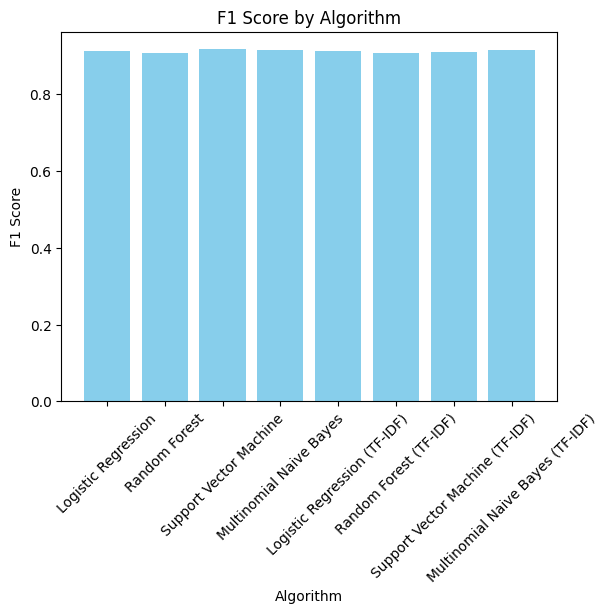

In [57]:
plt.bar(f1_score_df['Algorithm'], f1_score_df['F1 Score'],color='skyblue')
plt.title('F1 Score by Algorithm')
plt.xlabel('Algorithm' )
plt.xticks(rotation=45)
plt.ylabel('F1 Score')
plt.show()

In [71]:
import os
import joblib

# Define the directory path to save the models
local_path = "/drive/MyDrive/best_models"
if not os.path.exists(local_path):
    os.makedirs(local_path)

# Save the best models
for name, model in best_models.items():
    joblib.dump(model, os.path.join(local_path, f'{name}.pkl'))

# Load the best models from the local directory
loaded_models = {}
for name in best_models.keys():
    loaded_model = joblib.load(os.path.join(local_path, f'{name}.pkl'))
    loaded_models[name] = loaded_model
    print("*"*10, name, "*"*10)

    # Making predictions on test data (assuming X_test and y_test are defined)
    y_test_pred = loaded_model.predict(X_test)

    # Calculating F1 score (assuming you have imported f1_score)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    print("Test Score (F1)", f1)

    # Getting model size
    print("Model Size:", os.path.getsize(os.path.join(local_path, f'{name}.pkl')), "Bytes")


********** Logistic Regression **********
Test Score (F1) 0.9126173788097977
Model Size: 117997 Bytes
********** Random Forest **********
Test Score (F1) 0.9073568558756756
Model Size: 33589188 Bytes
********** Support Vector Machine **********
Test Score (F1) 0.915409246238888
Model Size: 231977 Bytes
********** Multinomial Naive Bayes **********
Test Score (F1) 0.9151062184087924
Model Size: 491322 Bytes
********** Logistic Regression (TF-IDF) **********
Test Score (F1) 0.9115233599087811
Model Size: 256129 Bytes
********** Random Forest (TF-IDF) **********
Test Score (F1) 0.9066513915708371
Model Size: 6117026 Bytes
********** Support Vector Machine (TF-IDF) **********
Test Score (F1) 0.9078510370234957
Model Size: 623133 Bytes
********** Multinomial Naive Bayes (TF-IDF) **********
Test Score (F1) 0.9137939931215799
Model Size: 491422 Bytes
